# Import Packages 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing

# Reading Data

In [2]:
df=pd.read_csv('Activity.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [3]:
DFTest=pd.read_csv('X_test.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,...,583,584,585,586,587,588,589,590,591,Activity
0,2135.236252,281.976538,-0.109396,875.771368,-0.123244,-0.281097,-0.265103,1897.816418,851.707715,0.217989,...,NaN,-0.606182,NaN,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227,WALKING
1,2135.311377,281.974815,-0.147144,875.701796,-0.105104,-0.372639,-0.383011,1897.854053,851.639244,0.069007,...,125.017049,-0.668752,-0.521300,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432,WALKING_UPSTAIRS
2,2135.368373,281.960616,-0.148159,875.971211,-0.049818,-0.500648,-0.108752,1898.014887,851.496415,0.137359,...,NaN,-0.462907,-0.225391,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002,WALKING_UPSTAIRS
3,2135.263336,281.983004,-0.103230,875.016028,-0.988986,-0.991141,-0.985290,1897.010854,851.008325,-0.933950,...,125.000547,-0.997064,-0.984804,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020,LAYING
4,2135.281720,281.984030,-0.110049,875.007066,-0.994860,-0.995871,-0.993036,1897.006260,851.004576,-0.938318,...,NaN,-0.998858,-0.993022,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,2135.079402,282.140627,-0.125298,875.132585,0.073153,-0.943445,-0.863163,1898.086906,851.060549,-0.925076,...,NaN,-0.982536,NaN,735.454192,-0.011720,-0.917733,2135.079402,573.006384,352.001088,SITTING
9986,2135.274545,282.010493,-0.143173,875.634461,-0.108416,-0.615635,-0.380406,1897.882354,851.390695,-0.193712,...,125.020139,-0.483664,-0.397042,734.014706,0.780852,-0.732555,2135.274545,573.265398,352.085728,WALKING
9987,2135.285663,281.983356,-0.109658,876.192759,0.140667,NaN,0.179245,1898.124981,851.554944,0.396325,...,NaN,-0.064028,0.136585,734.184942,0.893465,-0.620848,2135.285663,573.342333,352.020686,WALKING_DOWNSTAIRS
9988,NaN,281.994029,NaN,875.799827,0.051767,-0.474430,-0.224016,1898.034147,851.561301,-0.080235,...,NaN,-0.265202,-0.243837,734.096657,0.784232,-0.358635,2135.292354,573.230408,352.037431,WALKING_DOWNSTAIRS


In [5]:
DFTest

,1,2,3,4,5,6,7,8,10,11,...,582,583,584,585,586,587,588,589,590,591
0,2135.277880,281.982374,-0.108436,875.005198,-0.952356,-0.979984,-0.995380,1897.051449,-0.937402,-0.550173,...,-0.999897,125.000707,-0.988601,-0.995886,734.005904,-0.336026,-0.968572,2135.277880,573.000215,352.000192
1,2135.274649,281.977831,-0.120136,875.002610,-0.993128,-0.979517,-0.998225,1897.007912,-0.942807,-0.580385,...,-0.999864,NaN,-0.999030,-0.998731,734.015125,-0.890670,-0.968459,2135.274649,573.000061,352.000007
2,2135.259475,281.985347,-0.104619,875.041627,-0.963087,-0.984063,-0.957998,1897.040356,-0.914429,-0.557181,...,-0.999797,NaN,-0.991843,-0.956208,734.006320,-0.573251,-0.970980,2135.259475,573.000158,352.000017
3,2135.307123,281.961987,-0.145827,875.697118,-0.150019,-0.125775,-0.337688,1897.835300,-0.217076,-0.105233,...,-0.931232,NaN,-0.460524,NaN,734.272621,0.801238,0.070937,2135.307123,573.236869,352.185924
4,2135.141467,281.955141,-0.072572,876.139005,-0.229146,0.118600,0.032058,1897.682290,0.551623,0.210984,...,-0.725425,NaN,-0.486854,NaN,734.171993,0.857132,0.026913,2135.141467,573.284080,352.042186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2135.286841,281.986279,NaN,875.030453,-0.914033,-0.950577,-0.971859,1897.080921,-0.891277,-0.493893,...,-0.995389,125.001542,-0.964727,NaN,734.000316,-0.009229,-0.963581,2135.286841,573.004217,352.000277
305,2135.276039,281.985130,-0.080196,875.070146,-0.800382,-0.736420,-0.950752,1897.178953,-0.802627,-0.428028,...,-0.994159,125.003597,-0.895115,-0.972352,734.047733,0.273691,-0.728726,2135.276039,573.010055,352.000224
306,2135.302184,281.966213,-0.130727,875.569464,-0.254964,-0.111800,-0.457695,1897.721497,-0.290227,-0.011022,...,-0.904010,125.067424,-0.330258,-0.524783,734.232088,0.781728,-0.012748,2135.302184,573.194881,352.024802
307,2134.127605,282.154608,0.330753,875.939361,-0.306884,0.068578,-0.104270,1897.755408,-0.835074,0.039751,...,-0.925590,NaN,-0.918539,-0.142425,734.767301,0.499777,0.336663,2134.127605,573.014223,352.006263


# Exploratory Data Analysis (EDA)

In [6]:
df.isna().sum()

1           1000
2              0
3           1006
4              0
5              0
            ... 
588            0
589            0
590            0
591            0
Activity       0
Length: 592, dtype: int64

In [7]:
df.isna().sum().sum()

40964

In [8]:
Ac=pd.DataFrame(df['Activity'])

In [9]:
Ac.Activity.value_counts()

LAYING                1900
STANDING              1838
SITTING               1723
WALKING               1665
WALKING_UPSTAIRS      1498
WALKING_DOWNSTAIRS    1366
Name: Activity, dtype: int64

In [10]:
Ac.Activity.isna().sum()

0

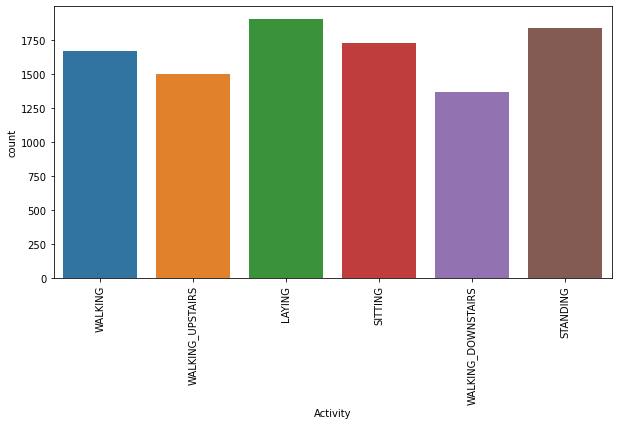

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['Activity'], data=df)
plt.xticks(x = df['Activity'],  rotation='vertical')
plt.show()

In [13]:
DFTr=df.drop(['Activity'],axis=1)

In [14]:
DFTr

,1,2,3,4,5,6,7,8,9,10,...,582,583,584,585,586,587,588,589,590,591
0,2135.236252,281.976538,-0.109396,875.771368,-0.123244,-0.281097,-0.265103,1897.816418,851.707715,0.217989,...,-0.621741,NaN,-0.606182,NaN,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227
1,2135.311377,281.974815,-0.147144,875.701796,-0.105104,-0.372639,-0.383011,1897.854053,851.639244,0.069007,...,-0.862140,125.017049,-0.668752,-0.521300,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432
2,2135.368373,281.960616,-0.148159,875.971211,-0.049818,-0.500648,-0.108752,1898.014887,851.496415,0.137359,...,-0.896673,NaN,-0.462907,-0.225391,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002
3,2135.263336,281.983004,-0.103230,875.016028,-0.988986,-0.991141,-0.985290,1897.010854,851.008325,-0.933950,...,-0.999815,125.000547,-0.997064,-0.984804,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020
4,2135.281720,281.984030,-0.110049,875.007066,-0.994860,-0.995871,-0.993036,1897.006260,851.004576,-0.938318,...,-0.999875,NaN,-0.998858,-0.993022,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,2135.079402,282.140627,-0.125298,875.132585,0.073153,-0.943445,-0.863163,1898.086906,851.060549,-0.925076,...,-0.858270,NaN,-0.982536,NaN,735.454192,-0.011720,-0.917733,2135.079402,573.006384,352.001088
9986,2135.274545,282.010493,-0.143173,875.634461,-0.108416,-0.615635,-0.380406,1897.882354,851.390695,-0.193712,...,-0.829427,125.020139,-0.483664,-0.397042,734.014706,0.780852,-0.732555,2135.274545,573.265398,352.085728
9987,2135.285663,281.983356,-0.109658,876.192759,0.140667,NaN,0.179245,1898.124981,851.554944,0.396325,...,-0.846610,NaN,-0.064028,0.136585,734.184942,0.893465,-0.620848,2135.285663,573.342333,352.020686
9988,NaN,281.994029,NaN,875.799827,0.051767,-0.474430,-0.224016,1898.034147,851.561301,-0.080235,...,-0.934534,NaN,-0.265202,-0.243837,734.096657,0.784232,-0.358635,2135.292354,573.230408,352.037431


## Concatinating Test and Train Data 


In [15]:
DFConcat = pd.concat([DFTr, DFTest])

In [16]:
DFConcat

,1,2,3,4,5,6,7,8,9,10,...,582,583,584,585,586,587,588,589,590,591
0,2135.236252,281.976538,-0.109396,875.771368,-0.123244,-0.281097,-0.265103,1897.816418,851.707715,0.217989,...,-0.621741,NaN,-0.606182,NaN,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227
1,2135.311377,281.974815,-0.147144,875.701796,-0.105104,-0.372639,-0.383011,1897.854053,851.639244,0.069007,...,-0.862140,125.017049,-0.668752,-0.521300,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432
2,2135.368373,281.960616,-0.148159,875.971211,-0.049818,-0.500648,-0.108752,1898.014887,851.496415,0.137359,...,-0.896673,NaN,-0.462907,-0.225391,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002
3,2135.263336,281.983004,-0.103230,875.016028,-0.988986,-0.991141,-0.985290,1897.010854,851.008325,-0.933950,...,-0.999815,125.000547,-0.997064,-0.984804,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020
4,2135.281720,281.984030,-0.110049,875.007066,-0.994860,-0.995871,-0.993036,1897.006260,851.004576,-0.938318,...,-0.999875,NaN,-0.998858,-0.993022,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2135.286841,281.986279,NaN,875.030453,-0.914033,-0.950577,-0.971859,1897.080921,NaN,-0.891277,...,-0.995389,125.001542,-0.964727,NaN,734.000316,-0.009229,-0.963581,2135.286841,573.004217,352.000277
305,2135.276039,281.985130,-0.080196,875.070146,-0.800382,-0.736420,-0.950752,1897.178953,NaN,-0.802627,...,-0.994159,125.003597,-0.895115,-0.972352,734.047733,0.273691,-0.728726,2135.276039,573.010055,352.000224
306,2135.302184,281.966213,-0.130727,875.569464,-0.254964,-0.111800,-0.457695,1897.721497,NaN,-0.290227,...,-0.904010,125.067424,-0.330258,-0.524783,734.232088,0.781728,-0.012748,2135.302184,573.194881,352.024802
307,2134.127605,282.154608,0.330753,875.939361,-0.306884,0.068578,-0.104270,1897.755408,NaN,-0.835074,...,-0.925590,NaN,-0.918539,-0.142425,734.767301,0.499777,0.336663,2134.127605,573.014223,352.006263


In [17]:
DFcon = DFConcat.dropna(axis=1)

In [18]:
DFcon

,2,4,5,7,8,10,11,12,13,14,...,580,581,582,584,586,587,588,589,590,591
0,281.976538,875.771368,-0.123244,-0.265103,1897.816418,0.217989,-0.132213,-0.119169,0.300810,-0.037110,...,-0.808196,-0.670617,-0.621741,-0.606182,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227
1,281.974815,875.701796,-0.105104,-0.383011,1897.854053,0.069007,-0.185177,-0.411590,0.275415,0.115468,...,-0.938103,-0.918679,-0.862140,-0.668752,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432
2,281.960616,875.971211,-0.049818,-0.108752,1898.014887,0.137359,-0.069053,-0.360005,0.138482,0.216248,...,-0.930992,-0.883636,-0.896673,-0.462907,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002
3,281.983004,875.016028,-0.988986,-0.985290,1897.010854,-0.933950,-0.569576,-0.810454,0.832224,0.691552,...,-0.999822,-0.999781,-0.999815,-0.997064,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020
4,281.984030,875.007066,-0.994860,-0.993036,1897.006260,-0.938318,-0.572974,-0.823210,0.847510,0.694976,...,-0.999955,-0.999889,-0.999875,-0.998858,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,281.986279,875.030453,-0.914033,-0.971859,1897.080921,-0.891277,-0.493893,-0.786736,0.837023,0.653436,...,-0.999263,-0.998589,-0.995389,-0.964727,734.000316,-0.009229,-0.963581,2135.286841,573.004217,352.000277
305,281.985130,875.070146,-0.800382,-0.950752,1897.178953,-0.802627,-0.428028,-0.626317,0.729662,0.566190,...,-0.997117,-0.996957,-0.994159,-0.895115,734.047733,0.273691,-0.728726,2135.276039,573.010055,352.000224
306,281.966213,875.569464,-0.254964,-0.457695,1897.721497,-0.290227,-0.011022,-0.356775,0.320795,0.286297,...,-0.948077,-0.891761,-0.904010,-0.330258,734.232088,0.781728,-0.012748,2135.302184,573.194881,352.024802
307,282.154608,875.939361,-0.306884,-0.104270,1897.755408,-0.835074,0.039751,0.276748,-0.702185,0.642246,...,-0.980059,-0.959674,-0.925590,-0.918539,734.767301,0.499777,0.336663,2134.127605,573.014223,352.006263


In [19]:
DFC=DFcon.rename(columns={x:y for x,y in zip(DFcon.columns,range(1,len(DFcon.columns)))})

In [20]:
DFC

,1,2,3,4,5,6,7,8,9,10,...,549,550,551,552,553,554,555,556,557,591
0,281.976538,875.771368,-0.123244,-0.265103,1897.816418,0.217989,-0.132213,-0.119169,0.300810,-0.037110,...,-0.808196,-0.670617,-0.621741,-0.606182,734.183280,0.871030,-0.399949,2135.236252,573.367937,352.125227
1,281.974815,875.701796,-0.105104,-0.383011,1897.854053,0.069007,-0.185177,-0.411590,0.275415,0.115468,...,-0.938103,-0.918679,-0.862140,-0.668752,734.019049,0.826877,-0.324508,2135.311377,573.275864,352.027432
2,281.960616,875.971211,-0.049818,-0.108752,1898.014887,0.137359,-0.069053,-0.360005,0.138482,0.216248,...,-0.930992,-0.883636,-0.896673,-0.462907,734.159391,0.714265,-0.492571,2135.368373,573.197053,352.033002
3,281.983004,875.016028,-0.988986,-0.985290,1897.010854,-0.933950,-0.569576,-0.810454,0.832224,0.691552,...,-0.999822,-0.999781,-0.999815,-0.997064,734.005127,-0.618741,-0.993283,2135.263336,573.000178,352.000020
4,281.984030,875.007066,-0.994860,-0.993036,1897.006260,-0.938318,-0.572974,-0.823210,0.847510,0.694976,...,-0.999955,-0.999889,-0.999875,-0.998858,734.005172,-0.692740,-0.993393,2135.281720,573.000099,352.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,281.986279,875.030453,-0.914033,-0.971859,1897.080921,-0.891277,-0.493893,-0.786736,0.837023,0.653436,...,-0.999263,-0.998589,-0.995389,-0.964727,734.000316,-0.009229,-0.963581,2135.286841,573.004217,352.000277
305,281.985130,875.070146,-0.800382,-0.950752,1897.178953,-0.802627,-0.428028,-0.626317,0.729662,0.566190,...,-0.997117,-0.996957,-0.994159,-0.895115,734.047733,0.273691,-0.728726,2135.276039,573.010055,352.000224
306,281.966213,875.569464,-0.254964,-0.457695,1897.721497,-0.290227,-0.011022,-0.356775,0.320795,0.286297,...,-0.948077,-0.891761,-0.904010,-0.330258,734.232088,0.781728,-0.012748,2135.302184,573.194881,352.024802
307,282.154608,875.939361,-0.306884,-0.104270,1897.755408,-0.835074,0.039751,0.276748,-0.702185,0.642246,...,-0.980059,-0.959674,-0.925590,-0.918539,734.767301,0.499777,0.336663,2134.127605,573.014223,352.006263


## Principle Component Analysis (PCA)

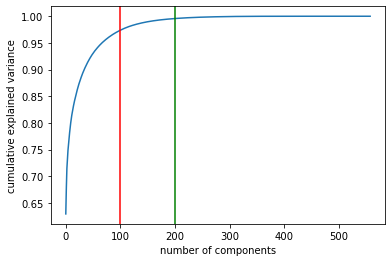

In [21]:
pca = PCA().fit(DFC)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=100,color='r')
plt.axvline(x=200,color='g')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [22]:
pca = PCA(200)
pca.fit(DFC)
x_pca=pca.transform(DFC)

In [23]:
x_pca

array([[ 5.37239836e+00,  2.64736657e-01, -3.67613713e-01, ...,
        -6.43671267e-02,  7.92950259e-02,  3.22540982e-02],
       [ 4.14877394e+00, -1.61569376e+00, -1.33601643e-02, ...,
        -3.31316601e-03,  4.77926778e-02, -1.32748204e-01],
       [ 4.46240574e+00, -1.58256759e+00,  4.45603190e-01, ...,
        -1.04529132e-01, -1.13579176e-01, -7.23404409e-03],
       ...,
       [ 3.96693703e+00, -1.16959236e+00, -5.27450177e-01, ...,
         1.41436840e-01,  1.37462791e-02,  4.08344298e-02],
       [ 2.46095195e+00, -3.11087511e+00,  3.30566052e+00, ...,
        -1.85499220e-01,  7.01162637e-02,  3.88757866e-02],
       [ 6.93772804e+00,  6.94733428e-01, -1.56239694e-01, ...,
        -5.02234288e-03, -6.89734501e-02, -1.95308819e-02]])

In [24]:
Xdata=pd.DataFrame(x_pca)

In [25]:
Xdata

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5.372398,0.264737,-0.367614,-0.499023,-0.269249,-0.415349,-0.009578,-0.962356,-0.278357,0.096027,...,-0.049446,-0.257415,0.031469,-0.022743,0.043732,-0.050902,-0.105495,-0.064367,0.079295,0.032254
1,4.148774,-1.615694,-0.013360,-0.874709,-1.252365,0.344912,0.357441,0.659671,-0.375708,-1.271335,...,0.016970,0.063488,0.008565,0.067341,-0.043330,0.008517,-0.095455,-0.003313,0.047793,-0.132748
2,4.462406,-1.582568,0.445603,0.014422,-1.307059,-0.801886,-1.265101,0.117169,-1.365993,-0.556408,...,-0.004456,0.022555,0.127493,0.059784,-0.054714,0.020595,0.004517,-0.104529,-0.113579,-0.007234
3,-5.839180,1.559996,1.736119,-0.462684,0.161322,1.469966,-0.844106,-0.825044,0.509507,0.579259,...,-0.012749,-0.016647,-0.028319,0.028346,0.017061,0.031094,0.028608,-0.014174,-0.038783,-0.040964
4,-6.284635,2.384821,1.915230,-0.306029,0.184282,0.134090,-0.831836,-0.110689,-0.614050,-0.017303,...,0.024137,-0.021713,-0.011021,-0.063248,0.001036,-0.018019,0.014824,-0.028651,-0.008277,0.014258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,-4.216054,0.405779,2.343923,-1.903265,0.219748,0.464327,-0.585251,-0.260169,0.082013,1.001584,...,-0.060507,0.034674,0.034033,0.038827,-0.012037,0.026768,-0.033299,-0.031877,-0.013348,0.016370
10295,-2.050078,-2.002785,-0.882440,-1.909969,0.639567,-0.648335,-0.014307,0.445396,0.495249,0.723138,...,0.012460,0.009062,0.041188,-0.013787,0.047513,-0.013986,-0.043518,-0.024311,-0.026804,-0.056624
10296,3.966937,-1.169592,-0.527450,-1.346091,0.421937,1.144822,-0.543981,-0.514127,-1.058384,-0.794274,...,-0.034929,-0.037949,-0.065750,0.022548,0.003059,0.111827,-0.006977,0.141437,0.013746,0.040834
10297,2.460952,-3.110875,3.305661,1.456444,-1.864438,3.368396,-1.000931,0.454793,1.157720,1.791476,...,-0.103873,-0.063890,0.051092,0.095547,0.039422,0.143984,0.108142,-0.185499,0.070116,0.038876


## Seperating Test and Train after Principle component analysis 

In [26]:
df_train =Xdata.iloc[:9990,:] #After concatination and dropping columns 
df_test = Xdata.iloc[9990:,:]

In [27]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5.372398,0.264737,-0.367614,-0.499023,-0.269249,-0.415349,-0.009578,-0.962356,-0.278357,0.096027,...,-0.049446,-0.257415,0.031469,-0.022743,0.043732,-0.050902,-0.105495,-0.064367,0.079295,0.032254
1,4.148774,-1.615694,-0.013360,-0.874709,-1.252365,0.344912,0.357441,0.659671,-0.375708,-1.271335,...,0.016970,0.063488,0.008565,0.067341,-0.043330,0.008517,-0.095455,-0.003313,0.047793,-0.132748
2,4.462406,-1.582568,0.445603,0.014422,-1.307059,-0.801886,-1.265101,0.117169,-1.365993,-0.556408,...,-0.004456,0.022555,0.127493,0.059784,-0.054714,0.020595,0.004517,-0.104529,-0.113579,-0.007234
3,-5.839180,1.559996,1.736119,-0.462684,0.161322,1.469966,-0.844106,-0.825044,0.509507,0.579259,...,-0.012749,-0.016647,-0.028319,0.028346,0.017061,0.031094,0.028608,-0.014174,-0.038783,-0.040964
4,-6.284635,2.384821,1.915230,-0.306029,0.184282,0.134090,-0.831836,-0.110689,-0.614050,-0.017303,...,0.024137,-0.021713,-0.011021,-0.063248,0.001036,-0.018019,0.014824,-0.028651,-0.008277,0.014258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-1.958317,-2.317060,1.212375,1.033579,-1.752536,1.291887,0.256166,-0.718368,0.070707,0.095930,...,-0.005251,-0.151962,0.083727,-0.018602,-0.140891,0.123926,-0.001958,-0.104803,0.058105,0.001322
9986,3.572301,-0.632075,-0.066649,-1.766323,-0.854836,-0.909303,0.099883,-0.679232,0.723691,0.177192,...,0.004881,-0.069121,0.026311,0.070839,0.025595,0.036446,0.007978,0.025395,0.026718,0.021869
9987,6.644669,-0.710806,0.114295,-0.266520,-1.723803,-0.465285,-1.379821,1.341458,-0.391270,-0.323558,...,0.010765,-0.042489,-0.012464,0.046764,0.001502,0.074037,0.098653,-0.019765,-0.016742,0.028043
9988,4.537787,-2.049929,0.626079,-0.107650,-0.674716,-1.171570,-0.464832,-0.643971,0.385940,0.652326,...,-0.000643,0.035167,-0.064154,0.032602,-0.085155,-0.004874,0.045590,-0.075476,-0.041846,-0.047540


In [28]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
9990,-5.386761,0.185119,-1.280324,0.523892,0.582086,-0.496142,0.710999,-0.014611,0.055442,-1.627991,...,-0.003990,0.003160,0.037176,0.040691,-0.002186,-0.032067,-0.032665,-0.004729,-0.017081,-0.016512
9991,-5.957431,0.477196,-1.719482,1.246528,-0.165768,-0.538814,0.149171,0.055371,0.658654,-0.516246,...,0.022088,-0.001615,0.002305,0.020695,0.024582,0.075736,0.057768,-0.022438,-0.009365,0.016015
9992,-5.471915,-0.142354,1.926075,1.000263,-0.944310,0.643545,0.549349,-0.988053,0.322872,-0.189757,...,-0.007036,0.011049,0.018084,-0.050312,0.012409,-0.014477,0.032423,-0.021434,-0.039584,0.012569
9993,4.618003,-0.800024,-0.208762,-1.250343,0.327957,0.666942,-0.196327,-0.413002,-0.967836,-1.211110,...,0.028243,0.116597,0.007765,-0.032112,0.049200,-0.071003,0.025867,0.102180,0.075474,-0.129588
9994,6.942559,0.647306,-0.122807,0.590246,-0.565275,1.791877,-0.863218,0.974318,-0.724731,-0.552340,...,0.019642,0.113766,0.068857,0.078926,0.065502,-0.083980,-0.012386,0.038976,0.057480,-0.014124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,-4.216054,0.405779,2.343923,-1.903265,0.219748,0.464327,-0.585251,-0.260169,0.082013,1.001584,...,-0.060507,0.034674,0.034033,0.038827,-0.012037,0.026768,-0.033299,-0.031877,-0.013348,0.016370
10295,-2.050078,-2.002785,-0.882440,-1.909969,0.639567,-0.648335,-0.014307,0.445396,0.495249,0.723138,...,0.012460,0.009062,0.041188,-0.013787,0.047513,-0.013986,-0.043518,-0.024311,-0.026804,-0.056624
10296,3.966937,-1.169592,-0.527450,-1.346091,0.421937,1.144822,-0.543981,-0.514127,-1.058384,-0.794274,...,-0.034929,-0.037949,-0.065750,0.022548,0.003059,0.111827,-0.006977,0.141437,0.013746,0.040834
10297,2.460952,-3.110875,3.305661,1.456444,-1.864438,3.368396,-1.000931,0.454793,1.157720,1.791476,...,-0.103873,-0.063890,0.051092,0.095547,0.039422,0.143984,0.108142,-0.185499,0.070116,0.038876


In [29]:
df_train['Activity']=Ac

<ipython-input-29-55ad0beed910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Activity']=Ac


In [30]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
0,5.372398,0.264737,-0.367614,-0.499023,-0.269249,-0.415349,-0.009578,-0.962356,-0.278357,0.096027,...,-0.257415,0.031469,-0.022743,0.043732,-0.050902,-0.105495,-0.064367,0.079295,0.032254,WALKING
1,4.148774,-1.615694,-0.013360,-0.874709,-1.252365,0.344912,0.357441,0.659671,-0.375708,-1.271335,...,0.063488,0.008565,0.067341,-0.043330,0.008517,-0.095455,-0.003313,0.047793,-0.132748,WALKING_UPSTAIRS
2,4.462406,-1.582568,0.445603,0.014422,-1.307059,-0.801886,-1.265101,0.117169,-1.365993,-0.556408,...,0.022555,0.127493,0.059784,-0.054714,0.020595,0.004517,-0.104529,-0.113579,-0.007234,WALKING_UPSTAIRS
3,-5.839180,1.559996,1.736119,-0.462684,0.161322,1.469966,-0.844106,-0.825044,0.509507,0.579259,...,-0.016647,-0.028319,0.028346,0.017061,0.031094,0.028608,-0.014174,-0.038783,-0.040964,LAYING
4,-6.284635,2.384821,1.915230,-0.306029,0.184282,0.134090,-0.831836,-0.110689,-0.614050,-0.017303,...,-0.021713,-0.011021,-0.063248,0.001036,-0.018019,0.014824,-0.028651,-0.008277,0.014258,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-1.958317,-2.317060,1.212375,1.033579,-1.752536,1.291887,0.256166,-0.718368,0.070707,0.095930,...,-0.151962,0.083727,-0.018602,-0.140891,0.123926,-0.001958,-0.104803,0.058105,0.001322,SITTING
9986,3.572301,-0.632075,-0.066649,-1.766323,-0.854836,-0.909303,0.099883,-0.679232,0.723691,0.177192,...,-0.069121,0.026311,0.070839,0.025595,0.036446,0.007978,0.025395,0.026718,0.021869,WALKING
9987,6.644669,-0.710806,0.114295,-0.266520,-1.723803,-0.465285,-1.379821,1.341458,-0.391270,-0.323558,...,-0.042489,-0.012464,0.046764,0.001502,0.074037,0.098653,-0.019765,-0.016742,0.028043,WALKING_DOWNSTAIRS
9988,4.537787,-2.049929,0.626079,-0.107650,-0.674716,-1.171570,-0.464832,-0.643971,0.385940,0.652326,...,0.035167,-0.064154,0.032602,-0.085155,-0.004874,0.045590,-0.075476,-0.041846,-0.047540,WALKING_DOWNSTAIRS


In [31]:
df_train.Activity.unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'STANDING'], dtype=object)

In [32]:
df_train.Activity.value_counts()

LAYING                1900
STANDING              1838
SITTING               1723
WALKING               1665
WALKING_UPSTAIRS      1498
WALKING_DOWNSTAIRS    1366
Name: Activity, dtype: int64

## Mapping Unique Activity string data to numeric data 

In [33]:
dic={'WALKING':1, 'WALKING_UPSTAIRS':2, 'LAYING':3, 'SITTING':4,
       'WALKING_DOWNSTAIRS':5, 'STANDING':6,}

In [34]:
Y = df_train['Activity'].map(dic)

In [35]:
df_train['ACTIVITY']= Y

<ipython-input-35-4eebba050f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ACTIVITY']= Y


In [36]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Activity,ACTIVITY
0,5.372398,0.264737,-0.367614,-0.499023,-0.269249,-0.415349,-0.009578,-0.962356,-0.278357,0.096027,...,0.031469,-0.022743,0.043732,-0.050902,-0.105495,-0.064367,0.079295,0.032254,WALKING,1
1,4.148774,-1.615694,-0.013360,-0.874709,-1.252365,0.344912,0.357441,0.659671,-0.375708,-1.271335,...,0.008565,0.067341,-0.043330,0.008517,-0.095455,-0.003313,0.047793,-0.132748,WALKING_UPSTAIRS,2
2,4.462406,-1.582568,0.445603,0.014422,-1.307059,-0.801886,-1.265101,0.117169,-1.365993,-0.556408,...,0.127493,0.059784,-0.054714,0.020595,0.004517,-0.104529,-0.113579,-0.007234,WALKING_UPSTAIRS,2
3,-5.839180,1.559996,1.736119,-0.462684,0.161322,1.469966,-0.844106,-0.825044,0.509507,0.579259,...,-0.028319,0.028346,0.017061,0.031094,0.028608,-0.014174,-0.038783,-0.040964,LAYING,3
4,-6.284635,2.384821,1.915230,-0.306029,0.184282,0.134090,-0.831836,-0.110689,-0.614050,-0.017303,...,-0.011021,-0.063248,0.001036,-0.018019,0.014824,-0.028651,-0.008277,0.014258,LAYING,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-1.958317,-2.317060,1.212375,1.033579,-1.752536,1.291887,0.256166,-0.718368,0.070707,0.095930,...,0.083727,-0.018602,-0.140891,0.123926,-0.001958,-0.104803,0.058105,0.001322,SITTING,4
9986,3.572301,-0.632075,-0.066649,-1.766323,-0.854836,-0.909303,0.099883,-0.679232,0.723691,0.177192,...,0.026311,0.070839,0.025595,0.036446,0.007978,0.025395,0.026718,0.021869,WALKING,1
9987,6.644669,-0.710806,0.114295,-0.266520,-1.723803,-0.465285,-1.379821,1.341458,-0.391270,-0.323558,...,-0.012464,0.046764,0.001502,0.074037,0.098653,-0.019765,-0.016742,0.028043,WALKING_DOWNSTAIRS,5
9988,4.537787,-2.049929,0.626079,-0.107650,-0.674716,-1.171570,-0.464832,-0.643971,0.385940,0.652326,...,-0.064154,0.032602,-0.085155,-0.004874,0.045590,-0.075476,-0.041846,-0.047540,WALKING_DOWNSTAIRS,5


In [37]:
DFTrain= df_train.drop(['Activity'],axis=1)

In [38]:
DFTrain

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,ACTIVITY
0,5.372398,0.264737,-0.367614,-0.499023,-0.269249,-0.415349,-0.009578,-0.962356,-0.278357,0.096027,...,-0.257415,0.031469,-0.022743,0.043732,-0.050902,-0.105495,-0.064367,0.079295,0.032254,1
1,4.148774,-1.615694,-0.013360,-0.874709,-1.252365,0.344912,0.357441,0.659671,-0.375708,-1.271335,...,0.063488,0.008565,0.067341,-0.043330,0.008517,-0.095455,-0.003313,0.047793,-0.132748,2
2,4.462406,-1.582568,0.445603,0.014422,-1.307059,-0.801886,-1.265101,0.117169,-1.365993,-0.556408,...,0.022555,0.127493,0.059784,-0.054714,0.020595,0.004517,-0.104529,-0.113579,-0.007234,2
3,-5.839180,1.559996,1.736119,-0.462684,0.161322,1.469966,-0.844106,-0.825044,0.509507,0.579259,...,-0.016647,-0.028319,0.028346,0.017061,0.031094,0.028608,-0.014174,-0.038783,-0.040964,3
4,-6.284635,2.384821,1.915230,-0.306029,0.184282,0.134090,-0.831836,-0.110689,-0.614050,-0.017303,...,-0.021713,-0.011021,-0.063248,0.001036,-0.018019,0.014824,-0.028651,-0.008277,0.014258,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-1.958317,-2.317060,1.212375,1.033579,-1.752536,1.291887,0.256166,-0.718368,0.070707,0.095930,...,-0.151962,0.083727,-0.018602,-0.140891,0.123926,-0.001958,-0.104803,0.058105,0.001322,4
9986,3.572301,-0.632075,-0.066649,-1.766323,-0.854836,-0.909303,0.099883,-0.679232,0.723691,0.177192,...,-0.069121,0.026311,0.070839,0.025595,0.036446,0.007978,0.025395,0.026718,0.021869,1
9987,6.644669,-0.710806,0.114295,-0.266520,-1.723803,-0.465285,-1.379821,1.341458,-0.391270,-0.323558,...,-0.042489,-0.012464,0.046764,0.001502,0.074037,0.098653,-0.019765,-0.016742,0.028043,5
9988,4.537787,-2.049929,0.626079,-0.107650,-0.674716,-1.171570,-0.464832,-0.643971,0.385940,0.652326,...,0.035167,-0.064154,0.032602,-0.085155,-0.004874,0.045590,-0.075476,-0.041846,-0.047540,5


## Seperating the train data into X the data , and Y the class.

In [39]:
X = pd.DataFrame(DFTrain.drop(['ACTIVITY'],axis=1))
y = DFTrain.ACTIVITY.values.astype(int)

In [40]:
X.shape

(9990, 200)

In [41]:
y.shape

(9990,)

## Train Test Split 

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=2,shuffle =True,stratify=y)

# Models

### Support Vector Classifier 

In [43]:
accuracy_scores = np.zeros(5)

In [44]:
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

Support Vector Classifier accuracy: 97.69487412799515%


### Logistic Regression

In [54]:
clf = LogisticRegression(solver='lbfgs',max_iter=500).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))


Logistic Regression accuracy: 98.08917197452229%


### K Nearest Neighbors Classifier

In [55]:
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))


K Nearest Neighbors Classifier accuracy: 95.96602972399151%


### Random Forest Classifier 

In [56]:
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Random Forest Classifier accuracy: 92.26569608735214%


### Light Gradient Boosting Machine  Classifier (LGBM)

In [57]:
clf = LGBMClassifier().fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction)*100
print('LGBM Classifier accuracy: {}%'.format(accuracy_scores[4]))

LGBM Classifier accuracy: 96.36032757051865%


## Classifier Comparison 

Text(0.5, 1.0, 'Accuracy of various algorithms')

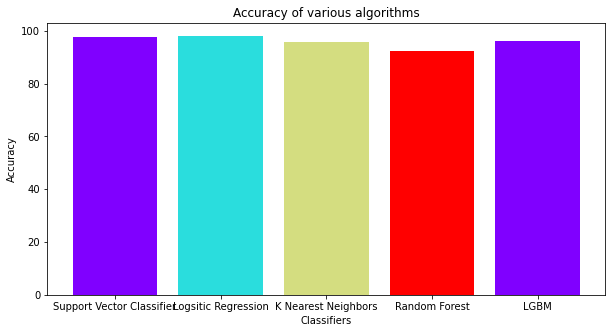

In [58]:

colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest','LGBM']
plt.figure(figsize=(10, 5))
plt.bar(labels,accuracy_scores, color = colors )
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')


# References 

https://stackabuse.com/change-figure-size-in-matplotlib/ 

https://towardsdatascience.com/activity-recognition-using-smartphones-machine-learning-application-a10e7b5578f9

https://nilesh-patil.github.io/blog/human-activity-recognition/

https://www.kaggle.com/rajasekaran2710/human-activity-recognition-using-pca-logistic-reg/code

https://www.kaggle.com/kashish8610/human-activity-recognition-using-neural-networks

https://www.kaggle.com/dskagglemt/svm-human-activity-recognition-with-smartphones

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16

https://www.kaggle.com/omermo/human-activity-recognition-95-acc

https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Linear_Regression_Project.html